# Reto 01

**Dr. Antonio Arista Jalife**

En este reto vamos a comparar máquinas de soporte vectorial, árboles de decisión y redes neuronales artificiales. Veremos cual es mejor para solucionar un problema. Primero, importamos las librerías. En esta ocasión usaremos "make_classification" en lugar de "make_blobs" para añadirle algo de dificultad a todos los clasificadores.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Observa que hace la función "make_classification":

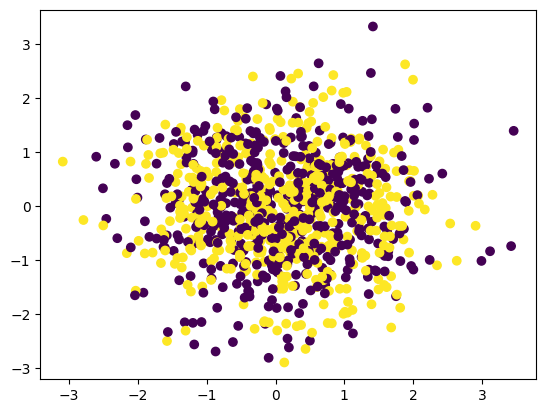

In [2]:
x, y = make_classification(n_samples=1000, n_classes=2, n_features=10)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

Como puedes ver, en esta ocasión los puntos se encuentran sumamente revueltos. Ahora los clasificadores pueden tener dificultades para separarlos!

Lo siguiente será utilizar el código de la sesión 02 para evaluar.

In [3]:
from sklearn.metrics import confusion_matrix

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))

    acc = calcularAccuracy(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    print("Precision:"+str(acc)+"%")
    print("Sensibilidad:"+str(sen)+"%")
    print("Especificidad:"+str(spec)+"%")

## **Redes Neuronales Artificiales:**

In [4]:
from sklearn.neural_network import MLPClassifier
NeuralNetwork = MLPClassifier(hidden_layer_sizes=(10,4),
                              max_iter=20000,
                              activation='logistic',
                              tol=1e-8)
NeuralNetwork.fit(x_train, y_train)
y_pred_nn = NeuralNetwork.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [5]:
evaluar(y_test, y_pred_nn)

[[187  11]
 [ 32 170]]
True positives: 170
True negatives: 187
False positives: 11
False negative: 32
Precision:89.25%
Sensibilidad:84.15841584158416%
Especificidad:94.44444444444444%


## **Random Forests:**

In [6]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators = 800)
RandomForest.fit(x_train, y_train)
y_pred__rfc = RandomForest.predict(x_test)

In [7]:
evaluar(y_test, y_pred__rfc)

[[186  12]
 [ 14 188]]
True positives: 188
True negatives: 186
False positives: 12
False negative: 14
Precision:93.5%
Sensibilidad:93.06930693069307%
Especificidad:93.93939393939394%


# Reto 02

**Dr. Antonio Arista Jalife**

En este reto vamos a comparar máquinas de soporte vectorial, árboles de decisión y redes neuronales artificiales. Veremos cual es mejor para solucionar un problema. Primero, importamos las librerías y utilizaremos nuevamente "make_classification" para agregarle dificultad

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Generamos nuestro dataset...

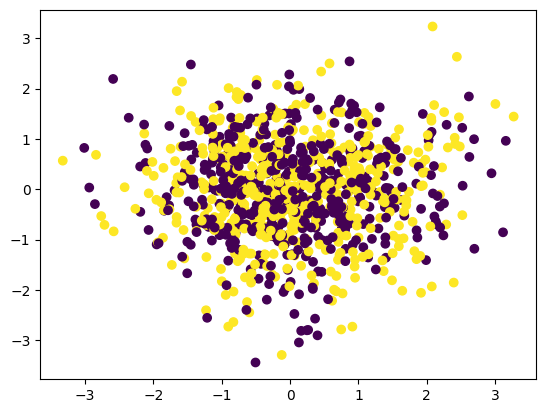

In [9]:
x1, y1 = make_classification(n_samples=1000, n_classes=2, n_features=10)
plt.scatter(x1[:,0], x1[:,1], c=y1)
plt.show()

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.4)

Y generamos nuestras funciones para evaluar

In [10]:
from sklearn.metrics import confusion_matrix

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))

    acc = calcularAccuracy(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    print("Precision:"+str(acc)+"%")
    print("Sensibilidad:"+str(sen)+"%")
    print("Especificidad:"+str(spec)+"%")

## **Support Vector Machine:**

In [11]:
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.pipeline import make_pipeline

SupportVectorMachine = SVC()
SupportVectorMachine.fit(x1_train, y1_train)
y_pred_svm = SupportVectorMachine.predict(x1_test)

In [12]:
evaluar(y1_test, y_pred_svm)

[[191  17]
 [ 14 178]]
True positives: 178
True negatives: 191
False positives: 17
False negative: 14
Precision:92.25%
Sensibilidad:92.70833333333334%
Especificidad:91.82692307692307%


## **Redes Neuronales Artificiales:**

In [13]:
from sklearn.neural_network import MLPClassifier
NeuralNetwork = MLPClassifier(hidden_layer_sizes=(10, 4),
                              max_iter=20000,
                              activation='logistic',
                              tol=1e-8)
NeuralNetwork.fit(x1_train, y1_train)
y1_predict_nn = NeuralNetwork.predict(x1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
evaluar(y1_test, y1_predict_nn)

[[181  27]
 [ 21 171]]
True positives: 171
True negatives: 181
False positives: 27
False negative: 21
Precision:88.0%
Sensibilidad:89.0625%
Especificidad:87.01923076923077%


## **Random Forests:**

In [15]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators = 800)
RandomForest.fit(x1_train, y1_train)
y1_pred_rfc = RandomForest.predict(x1_test)

In [16]:
evaluar(y1_test, y1_pred_rfc)

[[194  14]
 [ 12 180]]
True positives: 180
True negatives: 194
False positives: 14
False negative: 12
Precision:93.5%
Sensibilidad:93.75%
Especificidad:93.26923076923077%


# Reto 03

**Dr. Antonio Arista Jalife**

En este reto vamos a comparar todos los clasificadores entre si, para ver que tal funcionan. Podemos generar comparativas entre si y ver que tal funcionan.

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Generamos nuestro dataset...

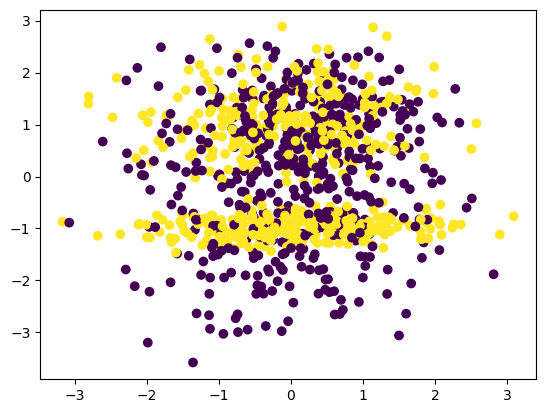

In [18]:
x2, y2 = make_classification(n_samples=1000, n_classes=2, n_features=10)
plt.scatter(x2[:,0], x2[:,1], c=y2)
plt.show()

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.4)

Y generamos nuestras funciones para evaluar

In [19]:
from sklearn.metrics import confusion_matrix

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))

    acc = calcularAccuracy(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    print("Precision:"+str(acc)+"%")
    print("Sensibilidad:"+str(sen)+"%")
    print("Especificidad:"+str(spec)+"%")

## **Naïve Bayes:**

In [20]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(x2_train, y2_train)
y2_pred_nb = NaiveBayes.predict(x2_test)

In [21]:
evaluar(y2_test, y2_pred_nb)

[[176  20]
 [ 32 172]]
True positives: 172
True negatives: 176
False positives: 20
False negative: 32
Precision:87.0%
Sensibilidad:84.31372549019608%
Especificidad:89.79591836734694%


## **Support Vector Machine:**

In [22]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

SupportVectorMachine = SVC()
SupportVectorMachine.fit(x2_train, y2_train)
y2_pred_svm = SupportVectorMachine.predict(x2_test)

In [23]:
evaluar(y2_test, y2_pred_svm)

[[176  20]
 [ 22 182]]
True positives: 182
True negatives: 176
False positives: 20
False negative: 22
Precision:89.5%
Sensibilidad:89.2156862745098%
Especificidad:89.79591836734694%


## **Redes Neuronales Artificiales:**

In [24]:
from sklearn.neural_network import MLPClassifier
NeuralNetwork = MLPClassifier(hidden_layer_sizes=(10,4),
                              max_iter=20000,
                              activation='logistic',
                              tol=1e-8)
NeuralNetwork.fit(x2_train, y2_train)
y2_pred_nn = NeuralNetwork.predict(x2_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
evaluar(y2_test, y2_pred_nn)

[[156  40]
 [ 45 159]]
True positives: 159
True negatives: 156
False positives: 40
False negative: 45
Precision:78.75%
Sensibilidad:77.94117647058823%
Especificidad:79.59183673469387%


## **Random Forests:**

In [26]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators = 800)
RandomForest.fit(x_train, y_train)
y_pred_rfc = RandomForest.predict(x_test)

In [27]:
evaluar(y_test, y_pred_rfc)

[[186  12]
 [ 14 188]]
True positives: 188
True negatives: 186
False positives: 12
False negative: 14
Precision:93.5%
Sensibilidad:93.06930693069307%
Especificidad:93.93939393939394%
